In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
mkdir ~/.kaggle
mv ~/D/kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json

SyntaxError: invalid syntax (3010317503.py, line 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/All Projects/ML/Mercedes Benz Dataset Project/train.csv')
df = pd.read_csv(r'C:/Users\Bipin\Downloads/Optimizing Testing Time for Mercedes-Benz/train.csv')
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [ ]:
le=LabelEncoder()
for i in df_obj.columns:
  df_obj[i]=le.fit_transform(df_obj[i])
df_obj.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [ ]:
df = df.drop(columns=df_obj.columns)

df.head()


,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns=['ID'],axis=1,inplace=True)
df.head()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = pd.concat([df_obj,df],axis=1)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,y,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,130.81,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,88.53,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,76.26,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,80.62,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,78.02,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

,0
X0,0
X1,0
X2,0
X3,0
X4,0
...,...
X380,0
X382,0
X383,0
X384,0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4204,False
4205,False
4206,False
4207,False


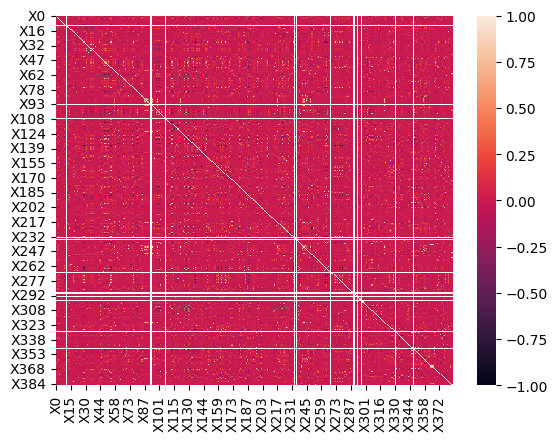

In [ ]:
heat_map=sns.heatmap(data.corr())
plt.show()

In [ ]:
y = df['y']

y.head()

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02


<Axes: xlabel='y', ylabel='Density'>

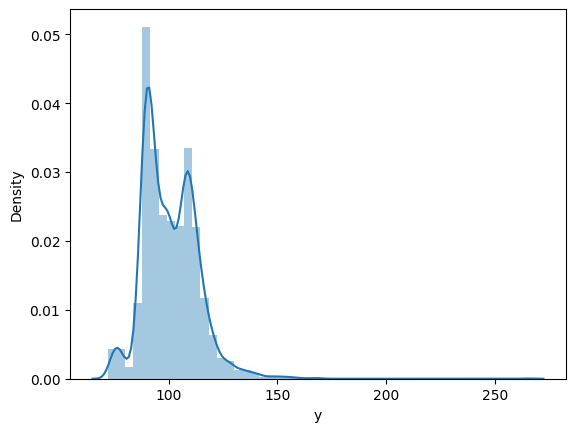

In [ ]:
sns.distplot(y)

<Axes: xlabel='y', ylabel='Density'>

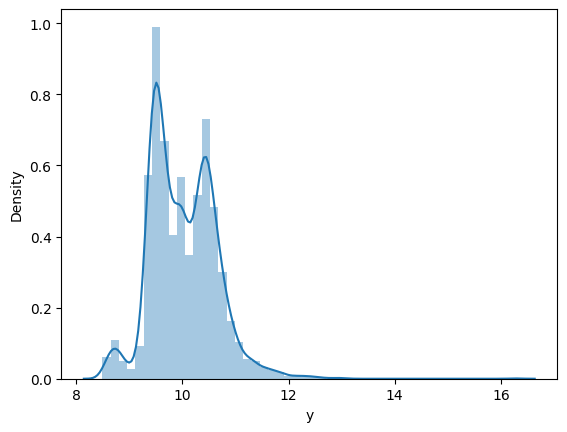

In [ ]:
sns.distplot(np.sqrt(y))

<Axes: xlabel='y', ylabel='Density'>

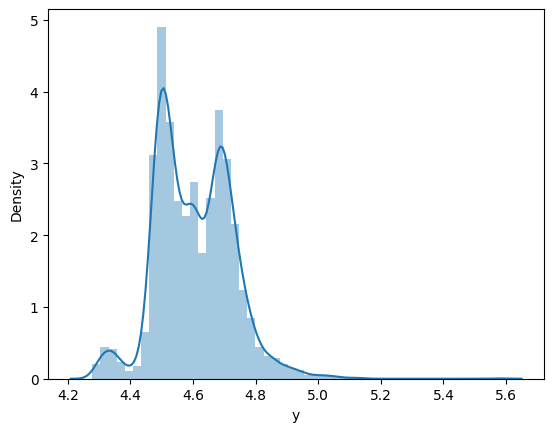

In [ ]:
sns.distplot(np.log(y))

<Axes: xlabel='y', ylabel='Density'>

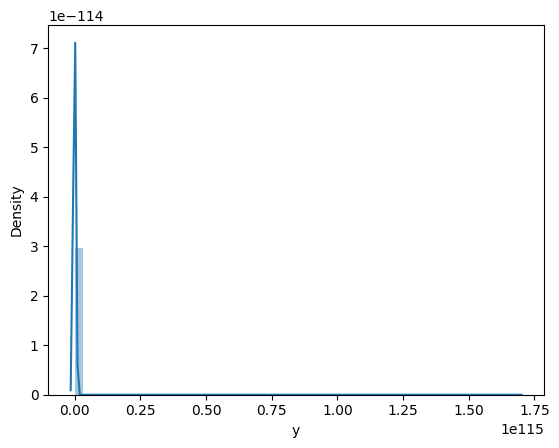

In [ ]:
sns.distplot(np.exp(y))

<Axes: xlabel='y', ylabel='Density'>

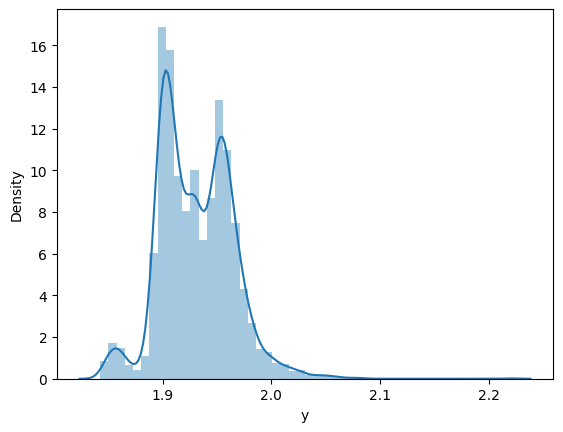

In [ ]:
sns.distplot(pow(y, 1/7))

In [ ]:
x = data.drop('y',axis=1)

y=df['y']

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
xcols=x.columns
sc=StandardScaler()
x_transformed=sc.fit_transform(x)
x=pd.DataFrame(x_transformed,columns=xcols)
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.163012,1.393488,-0.028122,-1.678270,0.028938,1.292117,0.751787,0.339445,-0.116122,0.0,...,-0.684167,-0.246447,1.475332,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
1,0.163012,1.159021,0.155388,0.620969,0.028938,1.776974,1.437511,0.339445,-0.116122,0.0,...,1.461630,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
2,-0.710560,1.510721,1.531709,-0.528650,0.028938,1.655760,0.751787,1.618389,-0.116122,0.0,...,-0.684167,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,11.425027,-0.040815,-0.021804,-0.037783
3,-0.710560,1.159021,1.531709,1.195779,0.028938,1.655760,1.437511,-1.081605,-0.116122,0.0,...,-0.684167,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
4,-0.710560,1.393488,1.531709,1.195779,0.028938,-0.162454,-1.305384,0.197340,-0.116122,0.0,...,-0.684167,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [ ]:
x_train.shape, y_train.shape

((3367, 376), (3367,))

In [ ]:
x_test.shape, y_test.shape

((842, 376), (842,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction = lr.predict(x_test)

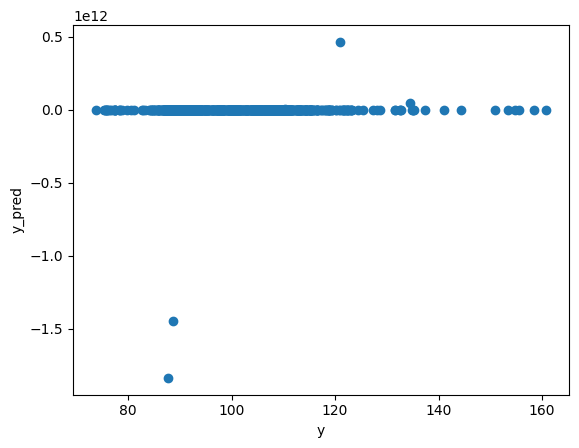

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 4515321195.032961
MSE: 6.766760413350731e+21
RMSE: 82260321014.14832


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
R=Ridge()
R.fit(x_train,y_train)

Ridge()

In [ ]:
prediction=R.predict(x_test)

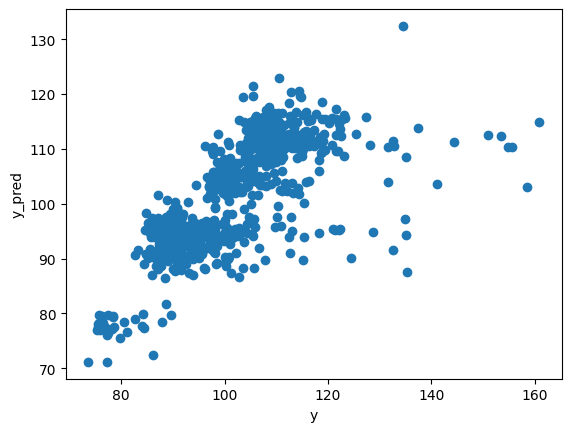

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [ ]:
R.score(x_test,y_test)

0.5223538728502797

In [ ]:
R.score(x_train,y_train)

0.5984389338972134

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 5.595352958417247
MSE: 71.37213473396365
RMSE: 8.448203047628747


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
prediction=dtr.predict(x_test)

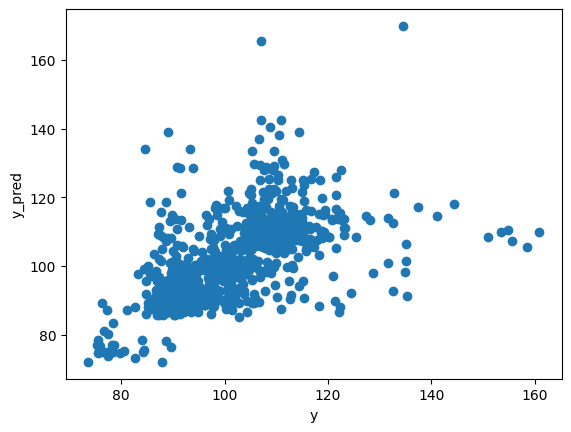

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [ ]:
dtr.score(x_test,y_test)

0.15469068840875821

In [ ]:
dtr.score(x_train,y_train)

0.976181305084292

In [ ]:
y_test

,y
4157,82.79
2922,88.39
903,99.18
2424,91.13
3391,89.88
...,...
3056,96.21
1797,109.90
3961,100.12
4149,111.15


In [ ]:
residual=y_test-prediction
residual

,y
4157,9.540
2922,-5.890
903,-11.760
2424,3.830
3391,-8.860
...,...
3056,7.455
1797,-1.760
3961,10.330
4149,2.630


<Axes: xlabel='y', ylabel='Density'>

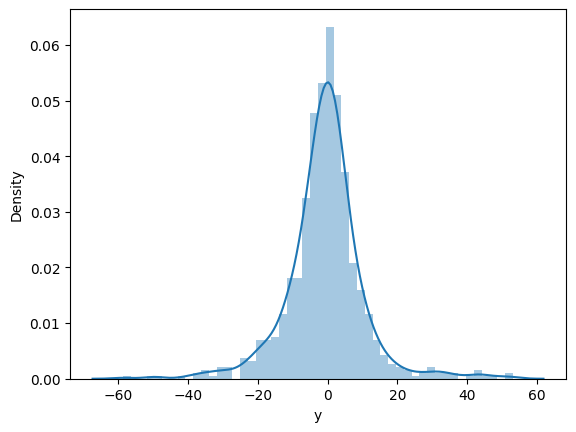

In [ ]:
sns.distplot(residual)

<Axes: ylabel='y'>

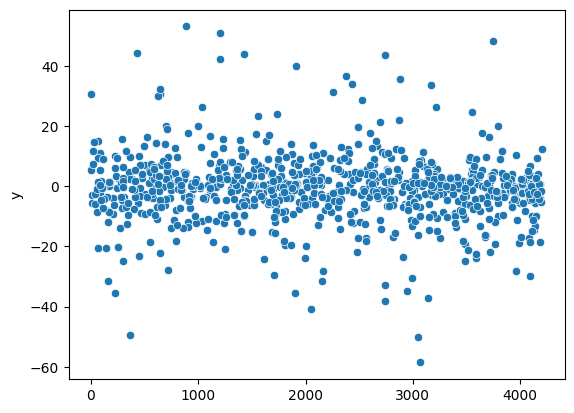

In [ ]:
sns.scatterplot(residual)       #homoscadasticity

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 7.424679136975455
MSE: 126.31009998716681
RMSE: 11.2387766232436


In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [ ]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
prediction=rf.predict(x_test)

In [ ]:
rf.score(x_test,y_test)

0.48619588044665807

In [ ]:
rf.score(x_train,y_train)

0.9078676062602014

In [ ]:
residual=y_test-prediction
residual

,y
4157,5.910500
2922,-4.531400
903,-4.958625
2424,-2.430248
3391,-3.543600
...,...
3056,0.180117
1797,-2.251400
3961,5.982900
4149,0.024868


<Axes: xlabel='y', ylabel='Density'>

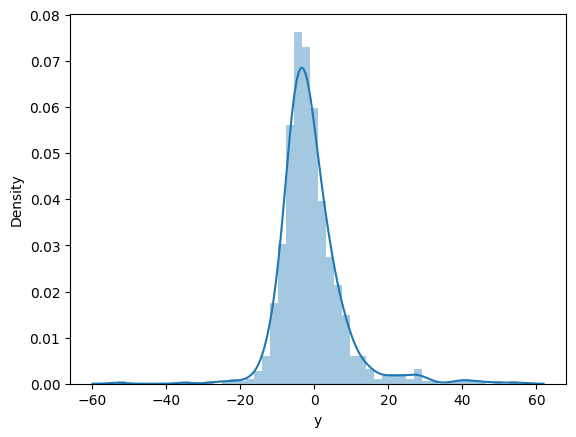

In [ ]:
sns.distplot(residual)

<Axes: ylabel='y'>

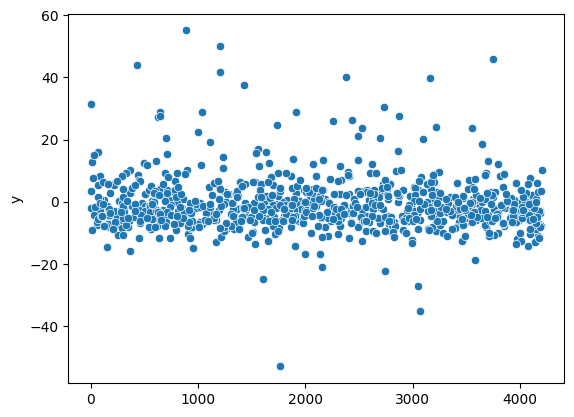

In [ ]:
sns.scatterplot(residual)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 5.920437868312407
MSE: 76.77503231619819
RMSE: 8.762136287241724


In [ ]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)


GradientBoostingRegressor()

In [ ]:
prediction=gb.predict(x_test)

In [ ]:
gb.score(x_test,y_test)

0.568765055549729

In [ ]:
gb.score(x_train,y_train)

0.6279962465797275

In [ ]:
residual=y_test-prediction

<Axes: xlabel='y', ylabel='Density'>

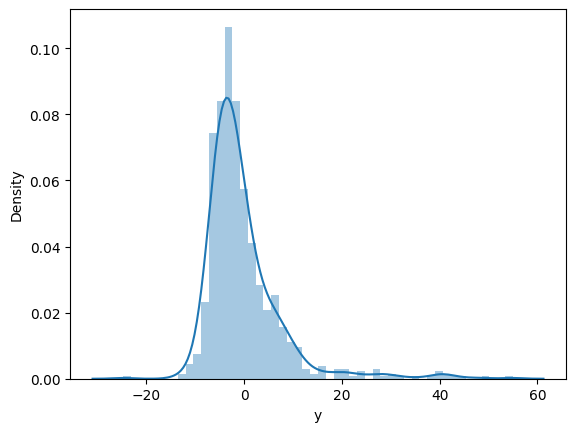

In [ ]:
sns.distplot(residual)

<Axes: ylabel='y'>

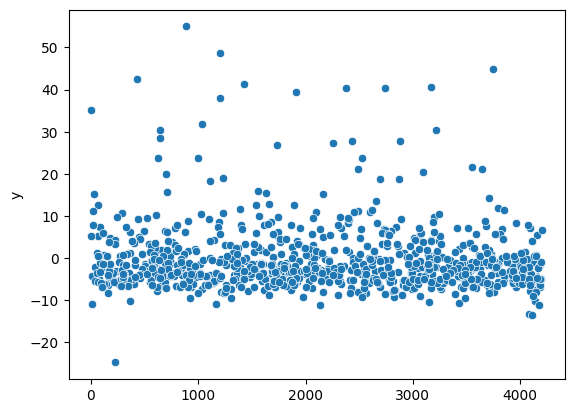

In [ ]:
sns.scatterplot(residual)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 5.267942303200415
MSE: 64.43715715013118
RMSE: 8.027275823723214


In [ ]:
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)


AdaBoostRegressor()

In [ ]:
prediction=ab.predict(x_test)

In [ ]:
ab.score(x_test,y_test)

-0.29478793044420537

In [ ]:
ab.score(x_train,y_train)

-0.006372514168022869

In [ ]:
residual=y_test-prediction
residual

,y
4157,-13.365864
2922,-17.099493
903,-11.192598
2424,-14.359493
3391,-10.509214
...,...
3056,-1.433127
1797,-9.553074
3961,0.480190
4149,-10.761380


<Axes: xlabel='y', ylabel='Density'>

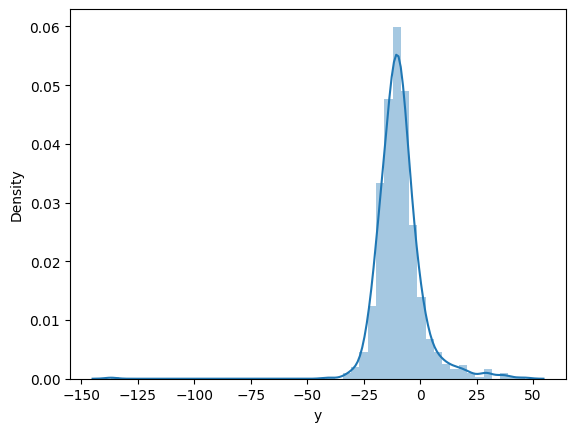

In [ ]:
sns.distplot(residual)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 11.412082944646231
MSE: 193.4733129210674
RMSE: 13.909468462923643


In [ ]:
from sklearn.svm import SVR

In [ ]:
sv=SVR()
sv.fit(x_train,y_train)

SVR()

In [ ]:
prediction=sv.predict(x_test)

In [ ]:
sv.score(x_test,y_test)

0.4490705196121202

In [ ]:
sv.score(x_train,y_train)

0.4590568036768201

In [ ]:
residual=y_test-prediction
residual

,y
4157,5.099683
2922,-4.508531
903,-2.726596
2424,2.488042
3391,-3.699451
...,...
3056,-1.031981
1797,2.454237
3961,0.825585
4149,1.743461


<Axes: xlabel='y', ylabel='Density'>

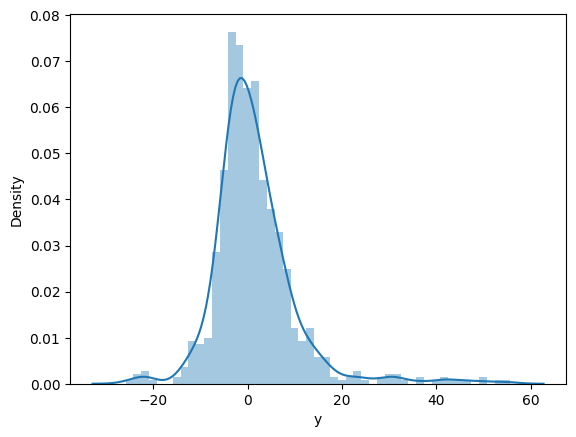

In [ ]:
sns.distplot(residual)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 5.779248343615124
MSE: 82.32247864710729
RMSE: 9.073173570868535
